
# Project: Investigate a Dataset (TMDB-movies)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


 ### The Research Questions
<ol>
<li>Top 10 Production Companies With Higher Number Of Release?</li>
<li>The income of film industry over years,is it profitable?</li>
<li>Which genre has the highest number of movies?</li>
<li>What is the relationship between the budget and the profit?</li>    
</ol>



<a id='intro'></a>
## Introduction

> This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue

In [1]:
#import all packages we need in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
Reading TMDb Movies Dataset.



In [2]:
#Print the first 5 rows in the file
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# print the column labels in the dataframe
for i, v in enumerate(df.columns):
    print(i, v)

0 id
1 imdb_id
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj


In [4]:
#Summary of TMDb file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning
<ul>
<li>The type of the **release_date** column is string, we need to change it to datetime.</li>
<li>Drop the duplicacy if there is.</li>
<li>Drop the null or 0 values from the data.</li>
<li>Drop some columns that we will not use or need.</li>
</ul>

In [5]:
# Convert 'release_date' type from str to datetime 
df["release_date"] = pd.to_datetime(df["release_date"])

In [6]:
#Check duplicated rows in the data
sum(df.duplicated())

1

In [7]:
#Drop duplicates
df.drop_duplicates(inplace=True)

In [8]:
#Confirm no duplicated rows in the data
sum(df.duplicated())

0

In [9]:
#Replace all values of 0 with NAN
df = df.replace(0, np.nan)

In [10]:
#Drop null values
df = df.dropna()

In [11]:
#Confirm cleaning 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 10760
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    1287 non-null   int64         
 1   imdb_id               1287 non-null   object        
 2   popularity            1287 non-null   float64       
 3   budget                1287 non-null   float64       
 4   revenue               1287 non-null   float64       
 5   original_title        1287 non-null   object        
 6   cast                  1287 non-null   object        
 7   homepage              1287 non-null   object        
 8   director              1287 non-null   object        
 9   tagline               1287 non-null   object        
 10  keywords              1287 non-null   object        
 11  overview              1287 non-null   object        
 12  runtime               1287 non-null   float64       
 13  genres           

<a id='eda'></a>
## Exploratory Data Analysis

>Now that we've trimmed and cleaned our data, we're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section. 
### Research Question 1 :What are the 10 production companies with higher number of release?

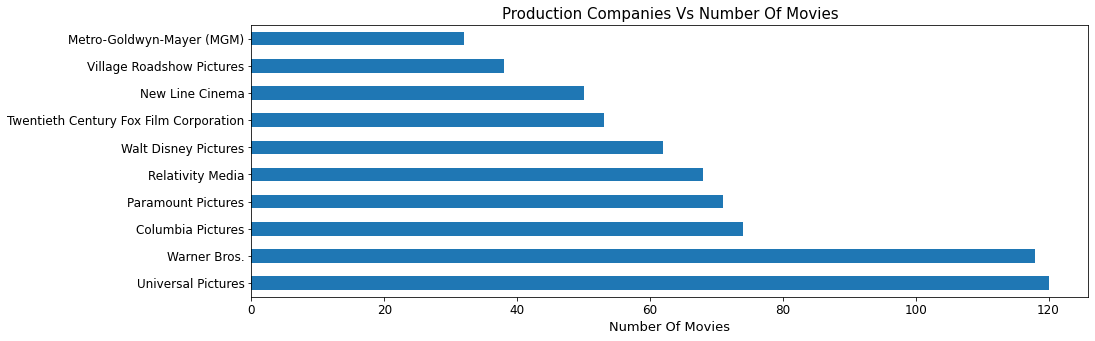

In [12]:
#concatenate all the rows of the genrs.
data_plot = df['production_companies'].str.cat(sep = '|')
data = pd.Series(data_plot.split('|'))
#conts each of the genre and return.
production_companies  = data.value_counts()

#plot he barh plot.
production_companies.iloc[:10].plot(kind='barh',figsize=(15,5),fontsize=12);
plt.title("Production Companies Vs Number Of Movies",fontsize=15);
plt.xlabel('Number Of Movies',fontsize=13);


#####                                                         
Universal Pictures company release 120 movies which is the highest. 

### Research Question 2 : Is the film industry making profit over years?

In [13]:
# Adding a new column from substract two columns and put it first one
df.insert(1,"profit",df["revenue"] - df["budget"])
df.head()

,id,profit,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,1.363529e+09,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,...,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,2.284364e+08,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,...,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,1.852382e+08,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,...,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,1.868178e+09,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,...,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,1.316249e+09,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,...,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


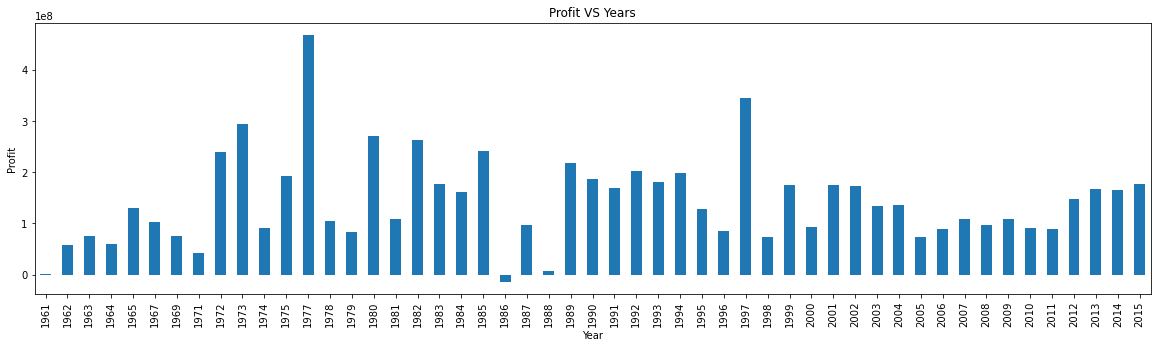

In [14]:
#Calculate the average of the profit of year.
avg_profit_year = df.groupby('release_year')['profit'].mean()

# plot relationship between release_year and profit.
avg_profit_year.plot(kind='bar',title='Profit VS Years',figsize = (20,5));
# x-axis name
plt.xlabel('Year');
# y-axis name
plt.ylabel('Profit');

### 
**1977** has the **highest** **profit** over years  

### Research Question 3 : Which genre has the highest number of movies ?

In [15]:
# Definding a function to separate the data in genres column and count the number of movies in each gener 
def separate_count(column):
    split_data = pd.Series(df[column].str.cat(sep = '|').split('|'))
    count_data = split_data.value_counts(ascending=False)
    return count_data

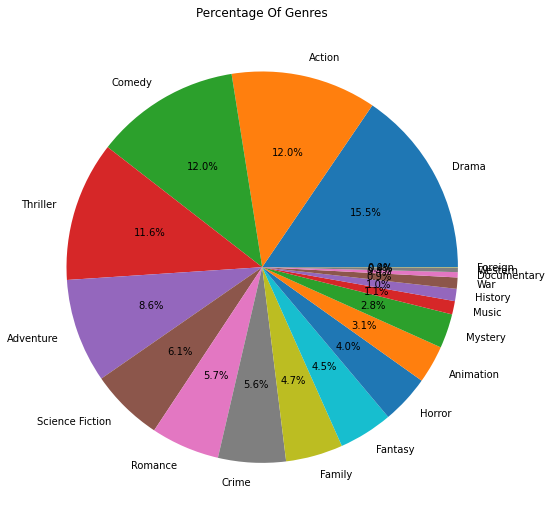

In [16]:
# Plot pie relationship between genre and number of movies
separate_count("genres").plot(kind="pie",figsize=(9,9),autopct="%1.1f%%")
# the title of the plot
plt.title('Percentage Of Genres')
plt.ylabel('');

### 
The genre who has the highest number of movies is **Drama** by **17%**.<br>
Next after drama is **comdey** by **13.1%**

### Research Question 4 : What is the relationship between the budget and the profit ?

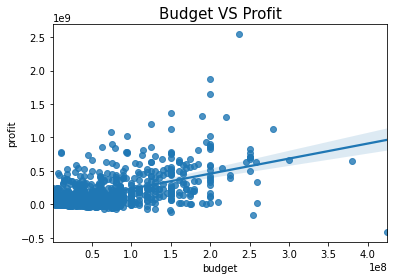

In [17]:
# Plot scatter plot for two columns
sns.regplot(x=df["budget"],y=df["profit"]).set_title("Budget VS Profit",size=15);


The more increasing the budget the more you get a haigh profit 

<a id='conclusions'></a>
## Conclusions

<ol>
<li>Universal Pictures is the highiest production companies in number of movies released</li>
<li>The film industry is a profitable industry over time.</li>
<li>The most trendy genre is Drama.</li>
<li>The more budget the movie have, More popular and profit will get.</li>  

</ol>



## Limitations

<ol>
<li>The results are effected with missing values in the data.</li>
<li>budget and revenue hasn't currency unit</li>
<li>Outliers in runtime, and decide what the best way to deal whith them.</li>
</ol>
